In [23]:
import pandas as pd
from opytex import texenv
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn-notebook")
from IPython.core.pylabtools import figsize
figsize = (16, 8)

# Informations sur le devoir

In [24]:
ds_name = "DM_16_01_29"
classe = "313"

latex_info = {}
latex_info['titre'] =  "DM 4"
latex_info['classe'] = "313"
latex_info['date'] = "29 janvier 2016"
latex_info

{'classe': '313', 'date': '29 janvier 2016', 'titre': 'DM 4'}

# Import et premiers traitements

In [25]:
notes = pd.ExcelFile("./../../../../notes/"+classe+".xlsx")
notes.sheet_names
notes = notes.parse(ds_name)

In [26]:
notes.index

Index(['DM_16_01_29', 'Malus', 'Exercice 1', '1.1 Developper',
       '1.2 Developper', '1.3 Double developpement', '1.4 Developpement carré',
       'Exercice 2', '2.1 Addition fraction', '2.2 Addition fractions',
       '2.3 Multiplication Fraction', '2.4 Multiplication Fraction',
       'Exercice 3', '1 (developper)', '2 (multiplication)', 'Exercice 4',
       'Comparaison', 'Pythagore', 'Thalès'],
      dtype='object')

In [27]:
notes = notes.T

In [28]:
#notes = notes.drop('av_arrondi', axis=1)
#notes = notes.drop('num_sujet', axis=1)

In [29]:
barem = notes[:1]
notes = notes[1:]

In [30]:
notes
#barem

DM_16_01_29  Malus  Exercice 1  1.1 Developper  \
ABDALLAH Touraya                    8.5    NaN         4.0               2   
ABDOU Mariam                       20.0    NaN         6.0               3   
ABTOIHI SAID Yasmina               13.5     -2         4.0               2   
AHAMED Anssuifidine                16.0    NaN         5.0               3   
AHAMED Issihaka                    16.0    NaN         5.5               3   
AHMED ABDOU El-Karim               10.0    NaN         5.5               3   
ANDILI Chayhati                     9.5    NaN         3.0               3   
ANDJILANE Rachma                   17.5    NaN         5.0               1   
ANLI Koudoussia                    14.5    NaN         4.0               3   
ATTOUMANI Hanissa                  18.5    NaN         5.5               3   
BACO ABDALLAH Moustadirane         15.5     -2         6.0               3   
BINALI Maoulida                    16.0    NaN         4.5               3   
BOINA Ainati                       16.0    NaN         4.5               2   
BOINA HASSANI Nahimi               11.5     -2         6.0               3   
DAOUD El-Farouk                    16.0    NaN         5.5               2   
DJADAR Ifrah                       11.5     -2         5.0               2   
HALIBOU Nafilati                    8.5    NaN         2.5               3   
HALIDI Tomsoyère                    NaN    NaN         0.0             NaN   
HOUMADI Himida                     11.5    NaN         3.0               3   
HOUMADI Antufati                   17.5    NaN         6.0               3   
HOUMADI ABDALLAH Abdallah          16.0    NaN         4.0               2   
IBRAHIM Laoura                     12.5    NaN         5.0               2   
MALIDE ABDOU Nasser                17.5    NaN         6.0               3   
MALIDE Younes                      18.5    NaN         6.0               3   
MOENY MOKO Nadjma                  18.5    NaN         6.0               3   
MOUGNIDAHO Nouriana                 NaN    NaN         0.0             NaN   
MOURTADJOU El-Fazar                15.5    NaN         6.0               3   
SAGAF Amal                          NaN    NaN         0.0             NaN   
SAID Chamsoudine                   19.0    NaN         5.5               3   
YANCOUB Toufa                      17.5    NaN         5.5               3   
YOUSSOUF Asma                      12.0    NaN         3.5               3   

                            1.2 Developper  1.3 Double developpement  \
ABDALLAH Touraya                         2                         1   
ABDOU Mariam                             3                         3   
ABTOIHI SAID Yasmina                     2                         2   
AHAMED Anssuifidine                      3                         2   
AHAMED Issihaka                          3                         3   
AHMED ABDOU El-Karim                     2                         3   
ANDILI Chayhati                          3                         0   
ANDJILANE Rachma                         3                         3   
ANLI Koudoussia                          3                         2   
ATTOUMANI Hanissa                        2                         3   
BACO ABDALLAH Moustadirane               3                         3   
BINALI Maoulida                          3                         3   
BOINA Ainati                             1                         3   
BOINA HASSANI Nahimi                     3                         3   
DAOUD El-Farouk                          3                         3   
DJADAR Ifrah                             2                         3   
HALIBOU Nafilati                         2                         0   
HALIDI Tomsoyère                       NaN                       NaN   
HOUMADI Himida                           3                         0   
HOUMADI Antufati                         3                         3   
HOUMADI ABDALLAH Ab

## Supression des notes inutiles 

In [31]:
notes = notes[notes[ds_name].notnull()]

In [32]:
notes = notes.astype(float)

## Traitement des notes

In [33]:
notes.T.index

Index(['DM_16_01_29', 'Malus', 'Exercice 1', '1.1 Developper',
       '1.2 Developper', '1.3 Double developpement', '1.4 Developpement carré',
       'Exercice 2', '2.1 Addition fraction', '2.2 Addition fractions',
       '2.3 Multiplication Fraction', '2.4 Multiplication Fraction',
       'Exercice 3', '1 (developper)', '2 (multiplication)', 'Exercice 4',
       'Comparaison', 'Pythagore', 'Thalès'],
      dtype='object')

Liste des exercices (non noté en compétences)

In [34]:
list_exo = ["Exercice "+str(i+1) for i in range(4)]
list_exo

['Exercice 1', 'Exercice 2', 'Exercice 3', 'Exercice 4']

Les autres types de notes (presentation, malus...) qui ne sont pas en compétences

In [35]:
autres_notes = ["Malus"]
#notes = notes.T.drop("Malus").T

In [36]:
notes[list_exo] = notes[list_exo].applymap(lambda x:round(x,2))
#notes[list_exo]

Les éléments avec notes et les éléments par compétences (sous_exo)

In [37]:
item_avec_note = list_exo + [ds_name] + autres_notes
sous_exo = [i for i in notes.T.index if i not in item_avec_note]
sous_exo

['1.1 Developper',
 '1.2 Developper',
 '1.3 Double developpement',
 '1.4 Developpement carré',
 '2.1 Addition fraction',
 '2.2 Addition fractions',
 '2.3 Multiplication Fraction',
 '2.4 Multiplication Fraction',
 '1 (developper)',
 '2 (multiplication)',
 'Comparaison',
 'Pythagore',
 'Thalès']

In [38]:
def toRepVal(val):
    if pd.isnull(val):
        return "\\NoRep"
    elif val == 0:
        return "\\RepZ"
    elif val == 1:
        return "\\RepU"
    elif val == 2:
        return "\\RepD"
    elif val == 3:
        return "\\RepT"
    else:
        return val

In [39]:
notes[item_avec_note] = notes[item_avec_note].fillna(".")
#notes

In [40]:
eleves = notes.copy()
eleves[sous_exo] = notes[sous_exo].applymap(toRepVal)

In [41]:
len(notes.T.index)

19

# Un peu de statistiques

In [42]:
notes[ds_name].describe()

count    28.000000
mean     14.821429
std       3.347786
min       8.500000
25%      11.875000
50%      16.000000
75%      17.500000
max      20.000000
Name: DM_16_01_29, dtype: float64

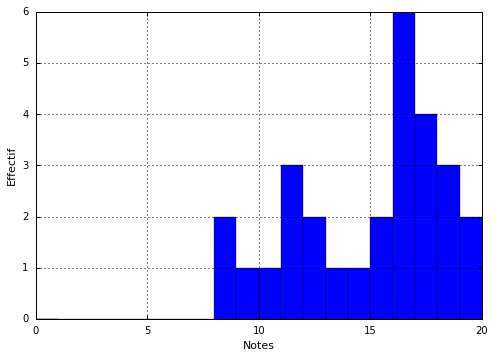

In [43]:
#notes_seules = notes[ds_name]
ax = notes[ds_name].hist(bins = barem[ds_name][0], range=(0,barem[ds_name][0]), )
ax.set_xlabel("Notes")
ax.set_ylabel("Effectif")
#notes_seules.hist()

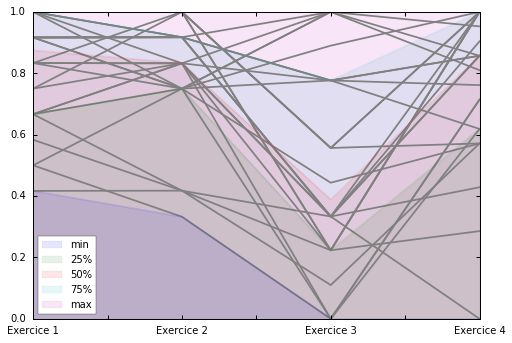

In [44]:
# Normalisation des notes de chaque exo
notes_exo_norm = notes[list_exo] / barem[list_exo].values[0,:]
#notes_exo_norm
ax = notes_exo_norm.T.plot(color = "gray", legend = False, )
d_norm =  notes_exo_norm.describe()
d_norm.T[["min", "25%", "50%", "75%", "max"]].plot(ax=ax, kind="area", stacked = False, alpha=.1)

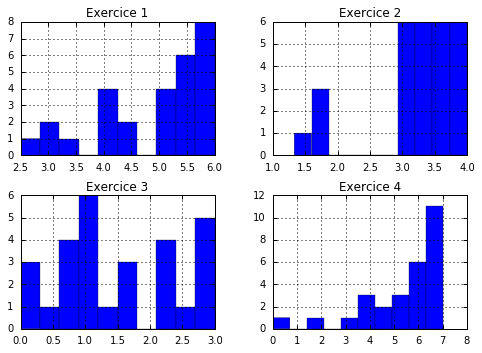

In [45]:
ax = notes[list_exo].hist()

In [46]:
notes_questions = notes[sous_exo]
notes_analysis = notes_questions.describe()
notes_analysis

1.1 Developper  1.2 Developper  1.3 Double developpement  \
count       28.000000       28.000000                 28.000000   
mean         2.678571        2.571429                  2.428571   
std          0.547964        0.572750                  0.997351   
min          1.000000        1.000000                  0.000000   
25%          2.000000        2.000000                  2.000000   
50%          3.000000        3.000000                  3.000000   
75%          3.000000        3.000000                  3.000000   
max          3.000000        3.000000                  3.000000   

       1.4 Developpement carré  2.1 Addition fraction  2.2 Addition fractions  \
count                28.000000              28.000000               28.000000   
mean                  2.178571               2.250000                2.642857   
std                   1.218790               1.109721                0.678467   
min                   0.000000               0.000000                0.000000   
25%                   2.000000               2.000000                2.000000   
50%                   3.000000               3.000000                3.000000   
75%                   3.000000               3.000000                3.000000   
max                   3.000000               3.000000                3.000000   

       2.3 Multiplication Fraction  2.4 Multiplication Fraction  \
count                    28.000000                    27.000000   
mean                      2.428571                     2.444444   
std                       0.572750                     0.974022   
min                       1.000000                     0.000000   
25%                       2.000000                     2.000000   
50%                       2.000000                     3.000000   
75%                       3.000000                     3.000000   
max                       3.000000                     3.000000   

       1 (developper)  2 (multiplication)  Comparaison  Pythagore     Thalès  
count       27.000000           21.000000    22.000000  27.000000  27.000000  
mean         2.259259            1.571429     2.272727   2.888889   2.148148  
std          1.059484            1.121224     1.077113   0.423659   0.863967  
min          0.000000            0.000000     0.000000   1.000000   1.000000  
25%          2.000000            1.000000     1.250000   3.000000   1.000000  
50%          3.000000            1.000000     3.000000   3.000000   2.000000  
75%          3.000000            3.000000     3.000000   3.000000   3.000000  
max          3.000000            3.000000     3.000000   3.000000   3.000000

In [47]:
# J'aimerai récupérer le nom des questions qui ont été le moins répondus
notes_analysis[:1]

1.1 Developper  1.2 Developper  1.3 Double developpement  \
count              28              28                        28   

       1.4 Developpement carré  2.1 Addition fraction  2.2 Addition fractions  \
count                       28                     28                      28   

       2.3 Multiplication Fraction  2.4 Multiplication Fraction  \
count                           28                           27   

       1 (developper)  2 (multiplication)  Comparaison  Pythagore  Thalès  
count              27                  21           22         27      27

# Preparation du fichier .tex

In [48]:
bilan = texenv.get_template("tpl_bilan.tex")
with open("./bilan"+classe+".tex","w") as f:
    f.write(bilan.render(eleves = eleves, barem = barem, ds_name = ds_name, latex_info = latex_info, nbr_questions = len(barem.T)))

## Bilan à remplir

In [28]:
bilan = texenv.get_template("tpl_bilan.tex")
with open("./fill_bilan.tex","w") as f:
    f.write(bilan.render(eleves = [("Nom", barem = barem, ds_name = ds_name, latex_info = latex_info, nbr_questions = len(barem.T)))

SyntaxError: invalid syntax (<ipython-input-28-5b3ec646b48a>, line 3)